In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
os.getcwd()

'C:\\Users\\USER'

In [5]:
sv = pd.read_csv('Survey.csv')

In [6]:
sv

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [11]:
sv.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [69]:
sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [19]:
sv['Major'].unique()

array(['Other', 'Management', 'CIS', 'Economics/Finance', 'Undecided',
       'International Business', 'Retailing/Marketing', 'Accounting'],
      dtype=object)

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)


2.1.1. Gender and Major

In [22]:
data_G_M = pd.crosstab(sv['Gender'], sv['Major'],margins = True)

In [23]:
print(data_G_M)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   
All              7    4                 11                       6   

Major   Management  Other  Retailing/Marketing  Undecided  All  
Gender                                                          
Female           4      3                    9          0   33  
Male             6      4                    5          3   29  
All             10      7                   14          3   62  


In [35]:
dat1 = sv[["Gender", "Major"]]

In [38]:
table = sm.stats.Table.from_data(dat1)

In [39]:
print(table.table_orig)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


2.1.2. Gender and Grad Intention

In [40]:
dat2 = sv[["Gender", "Grad Intention"]]

In [41]:
table = sm.stats.Table.from_data(dat2)

In [42]:
print(table.table_orig)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


2.1.3. Gender and Employment

In [43]:
dat3 = sv[["Gender", "Employment"]]

In [44]:
table = sm.stats.Table.from_data(dat3)

In [45]:
print(table.table_orig)

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


2.1.4. Gender and Computer

In [55]:
dat4 = sv[["Gender", "Computer"]]

In [64]:
table = sm.stats.Table.from_data(dat4)

In [65]:
print(table.table_orig)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

2.2.1. What is the probability that a randomly selected CMSU student will be male?
       What is the probability that a randomly selected CMSU student will be female?

In [68]:
sv['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [83]:
sv.groupby('Gender').size().div(len(sv))

Gender
Female    0.532258
Male      0.467742
dtype: float64

In [113]:
# probability that a randomly selected CMSU student will be male = 29/62 = 0.467742
# probability that a randomly selected CMSU student will be female = 33/62 = 0.532258

2.2.2. Find the conditional probability of different majors among the male students in CMSU.
Find the conditional probability of different majors among the female students of CMSU.

Find the conditional probability of different majors among the male students in CMSU

In [129]:
male =sv[sv['Gender']=='Male']

In [130]:
male

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
11,12,Male,21,Senior,Undecided,No,3.5,Full-Time,37.0,2,3,500,Laptop,100
12,13,Male,22,Senior,International Business,Undecided,3.4,Part-Time,40.0,2,3,400,Desktop,45
13,14,Male,22,Senior,International Business,Undecided,3.1,Part-Time,40.0,1,3,400,Laptop,150
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
15,16,Male,24,Senior,Management,Undecided,3.4,Part-Time,45.0,4,4,500,Laptop,175
17,18,Male,21,Junior,Economics/Finance,Undecided,3.1,Part-Time,55.0,2,3,600,Laptop,300


In [131]:
male.groupby(['Major']).size().div(len(male))

Major
Accounting                0.137931
CIS                       0.034483
Economics/Finance         0.137931
International Business    0.068966
Management                0.206897
Other                     0.137931
Retailing/Marketing       0.172414
Undecided                 0.103448
dtype: float64

Find the conditional probability of different majors among the female students of CMSU.

In [132]:
female =sv[sv['Gender']=='Female']

In [133]:
female

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
16,17,Female,19,Junior,CIS,Undecided,3.7,Part-Time,55.0,1,4,450,Laptop,150
19,20,Female,20,Junior,Management,Undecided,3.2,Unemployed,60.0,2,6,300,Laptop,350
20,21,Female,22,Junior,Retailing/Marketing,Undecided,3.2,Part-Time,55.0,1,3,690,Laptop,50


In [134]:
female.groupby(['Major']).size().div(len(female))

Major
Accounting                0.090909
CIS                       0.090909
Economics/Finance         0.212121
International Business    0.121212
Management                0.121212
Other                     0.090909
Retailing/Marketing       0.272727
dtype: float64

2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.

In [135]:
male.groupby(['Grad Intention']).size().div(len(male))

Grad Intention
No           0.103448
Undecided    0.310345
Yes          0.586207
dtype: float64

Find the conditional probability of intent to graduate, given that the student is a female.

In [136]:
female.groupby(['Grad Intention']).size().div(len(female))

Grad Intention
No           0.272727
Undecided    0.393939
Yes          0.333333
dtype: float64

2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [137]:
male.groupby(['Employment']).size().div(len(male))

Employment
Full-Time     0.241379
Part-Time     0.655172
Unemployed    0.103448
dtype: float64

In [138]:
female.groupby(['Employment']).size().div(len(female))

Employment
Full-Time     0.090909
Part-Time     0.727273
Unemployed    0.181818
dtype: float64

2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [139]:
male.groupby(['Computer']).size().div(len(male))

Computer
Desktop    0.103448
Laptop     0.896552
dtype: float64

In [140]:
female.groupby(['Computer']).size().div(len(female))

Computer
Desktop    0.060606
Laptop     0.878788
Tablet     0.060606
dtype: float64

In [ ]:
mv.groupby(['Major']).size().div(len(mv))

In [ ]:
sv.groupby(['Gender','Major']).size().div(len(sv))

Find the conditional probability of different majors among the female students of CMSU.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D19F308>,
      dtype=object)

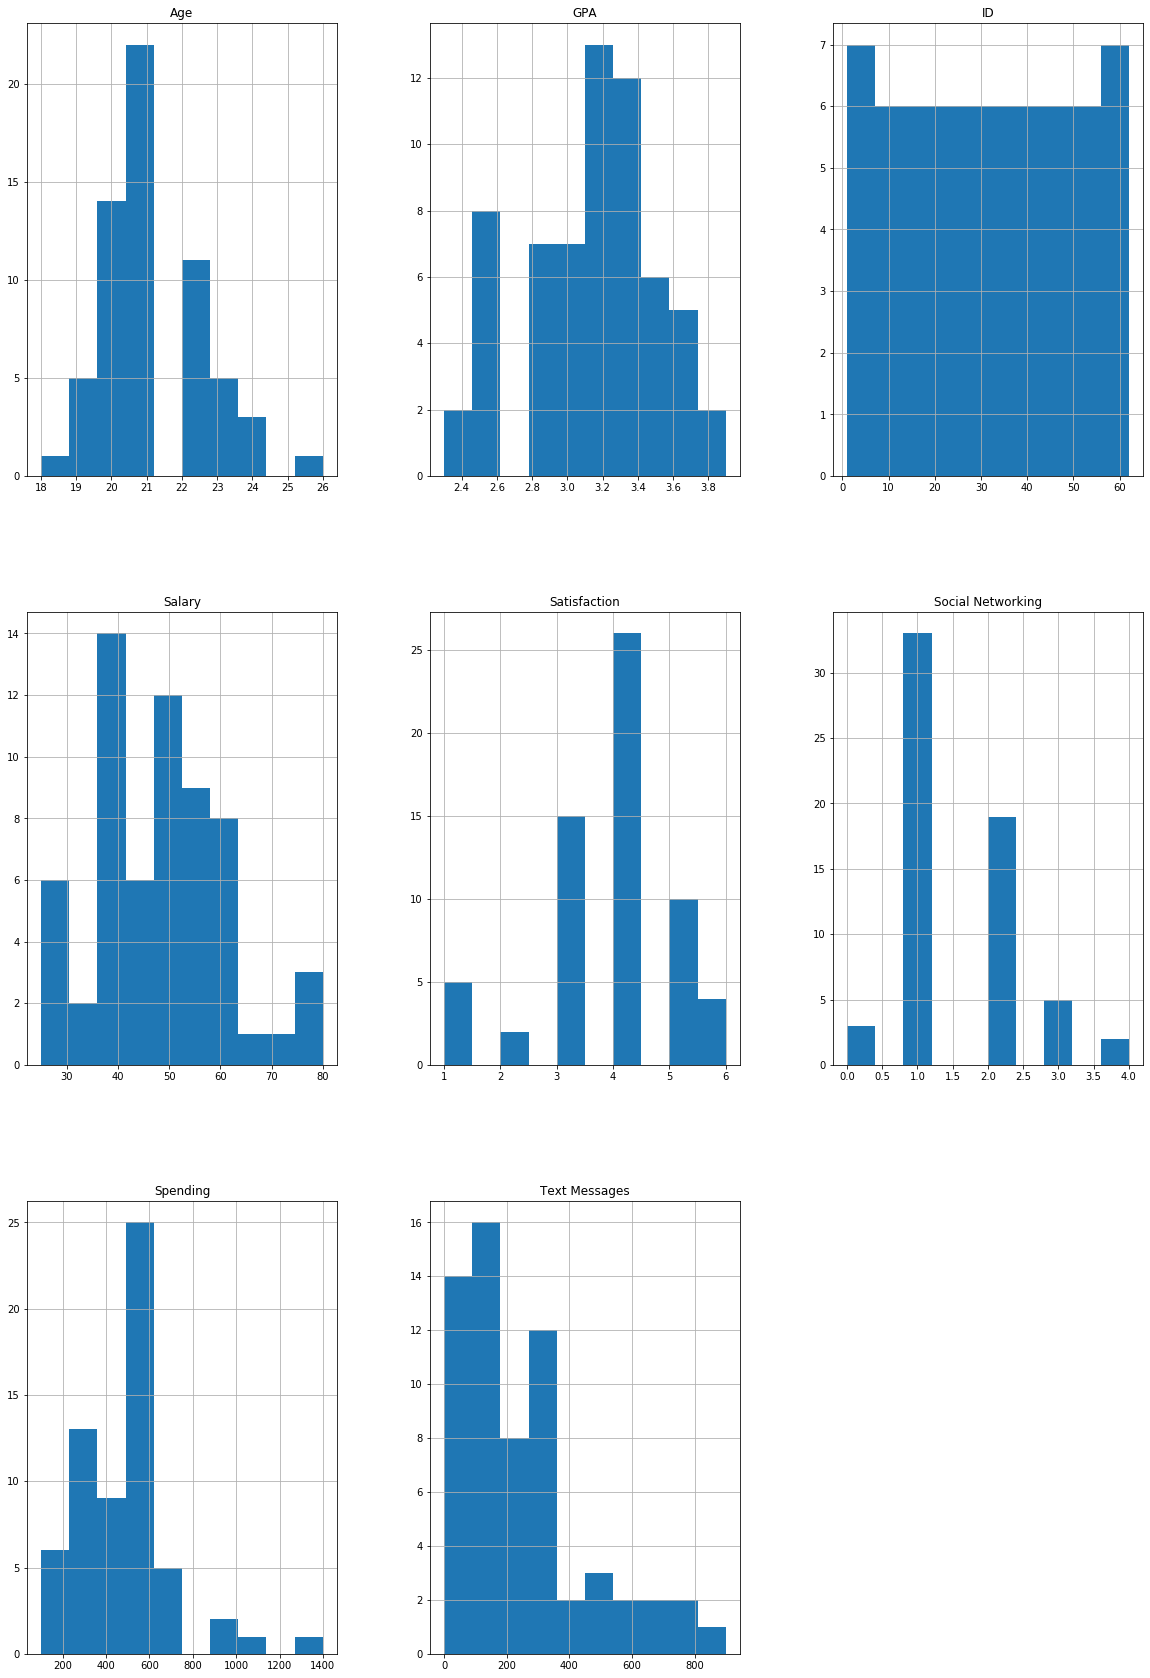

In [143]:
sv.hist(figsize=(20,30))

In [20]:
sv[(sv['Salary'] > 36.467) & (sv['Salary'] < 60.629)].count().div(len(sv))

ID                   0.790323
Gender               0.790323
Age                  0.790323
Class                0.790323
Major                0.790323
Grad Intention       0.790323
GPA                  0.790323
Employment           0.790323
Salary               0.790323
Social Networking    0.790323
Satisfaction         0.790323
Spending             0.790323
Computer             0.790323
Text Messages        0.790323
dtype: float64

In [25]:
sv[(sv['Salary'] > 12.306) & (sv['Salary'] < 84.791)].count().div(len(sv))

ID                   1.0
Gender               1.0
Age                  1.0
Class                1.0
Major                1.0
Grad Intention       1.0
GPA                  1.0
Employment           1.0
Salary               1.0
Social Networking    1.0
Satisfaction         1.0
Spending             1.0
Computer             1.0
Text Messages        1.0
dtype: float64

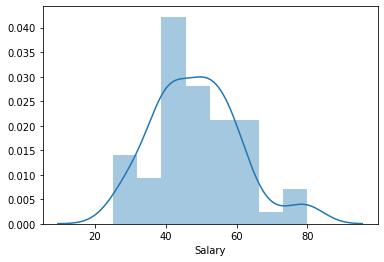

In [27]:
sns.distplot(sv['Salary'])

In [29]:
sv[(sv['Spending'] > 260.062) & (sv['Spending'] < 703.97)].count().div(len(sv))

ID                   0.806452
Gender               0.806452
Age                  0.806452
Class                0.806452
Major                0.806452
Grad Intention       0.806452
GPA                  0.806452
Employment           0.806452
Salary               0.806452
Social Networking    0.806452
Satisfaction         0.806452
Spending             0.806452
Computer             0.806452
Text Messages        0.806452
dtype: float64

In [33]:
sv[(sv['Spending'] > -183.845) & (sv['Spending'] < 1147.878)].count().div(len(sv))

ID                   0.983871
Gender               0.983871
Age                  0.983871
Class                0.983871
Major                0.983871
Grad Intention       0.983871
GPA                  0.983871
Employment           0.983871
Salary               0.983871
Social Networking    0.983871
Satisfaction         0.983871
Spending             0.983871
Computer             0.983871
Text Messages        0.983871
dtype: float64

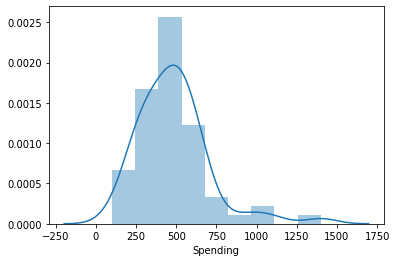

In [34]:
sns.distplot(sv['Spending'])

In [37]:
sv[(sv['Text Messages'] > -397.188) & (sv['Text Messages'] < 889.608)].count()

ID                   61
Gender               61
Age                  61
Class                61
Major                61
Grad Intention       61
GPA                  61
Employment           61
Salary               61
Social Networking    61
Satisfaction         61
Spending             61
Computer             61
Text Messages        61
dtype: int64

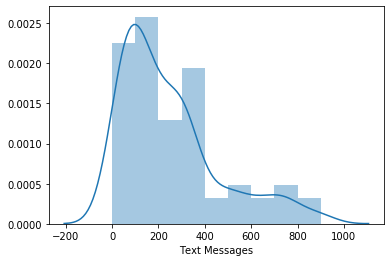

In [38]:
sns.distplot(sv['Text Messages'])